In [1]:
#Regressão Linear

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Uni_linear.txt', header = None)
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Lucro por população')

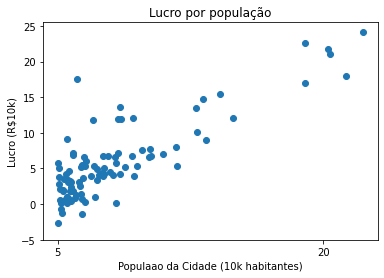

In [22]:
plt.scatter(df[0], df[1])
plt.xticks(np.arange(5,30,15))
plt.yticks(np.arange(-5,30,5))
plt.xlabel('Populaao da Cidade (10k habitantes)')
plt.ylabel('Lucro (R$10k)')
plt.title('Lucro por população')

In [13]:
#Função de Custo
def funcCusto(X, y, theta):
    m = len(y)
    h = X.dot(theta) #X*theta
    J = 1/(2*m)*(np.sum((h-y)**2))
    return  J

In [14]:
#Gradiente Descendente
def gradDescendente(X, y, theta, alpha, nbr_iter):
    J_history = []
    m = len(y)
    for i in range(nbr_iter):
        h = X.dot(theta)
        theta = theta -(alpha/m)*(X.T.dot(h-y))
        J_history.append(funcCusto(X, y, theta))
        
    return theta, J_history

In [16]:
X, y = df[0].values, df[1].values
m = X.shape[0]
X = np.append(np.ones([m,1]), X.reshape(m,1), axis=1) #axis = 0 (linha com linha) - concatenação
y = y.reshape(m,1)
theta = np.zeros([2,1])

In [17]:
cost = funcCusto(X, y, theta)
print(cost)

32.072733877455676


In [19]:
nbr_iter = 1500
alpha = 0.01
new_theta, J_history = gradDescendente(X, y, theta, alpha, nbr_iter)
print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [21]:
new_cost = funcCusto (X, y, new_theta)
print(new_cost)

4.483388256587725


Text(0.5, 1.0, 'Dados de TReinamento ajustados por Regressão Linear')

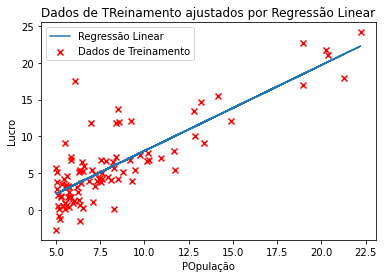

In [23]:
plt.scatter(X[:,1], y, c='red', marker = 'x', label='Dados de Treinamento')
plt.plot(X[:,1], np.dot(X, new_theta), label = 'Regressão Linear')
plt.ylabel('Lucro')
plt.xlabel('POpulação')
plt.legend()
plt.title('Dados de TReinamento ajustados por Regressão Linear')

In [24]:
print(X) #matriz X

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

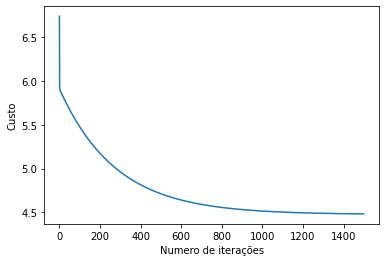

In [26]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Numero de iterações')
plt.ylabel('Custo')
plt.show()

In [27]:
def prediction (X, new_theta):
    pred = np.dot(X, new_theta)
    return pred

In [30]:
predict1 = prediction(np.array([1,3.5]), new_theta)*1e4
print(predict1)
print("Para uma população de 35000, o modelo prevê um lucro de R$" + str(round(predict1[0],2)))

[4519.7678677]
Para uma população de 35000, o modelo prevê um lucro de R$4519.77
